In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
default_df = pd.read_csv('/content/drive/Othercomputers/My Laptop/CREDIT_CARD_DEFAULT_PREDICTION/UCI_Credit_Card.csv.zip')
default_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
default_df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [6]:
default_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Text(0, 0.5, 'Number of card holders')

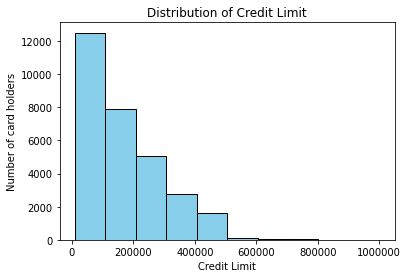

In [7]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist(default_df['LIMIT_BAL'], edgecolor='black', color='skyblue')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Number of card holders')

Text(0, 0.5, 'Credit Limit')

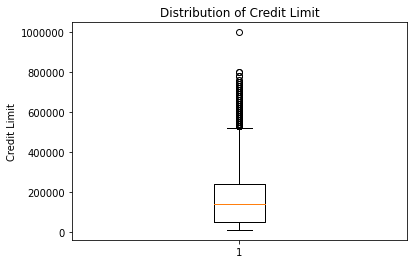

In [8]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.boxplot(default_df['LIMIT_BAL'])
plt.title('Distribution of Credit Limit')
plt.ylabel('Credit Limit')

Text(0, 0.5, 'Number of card holders')

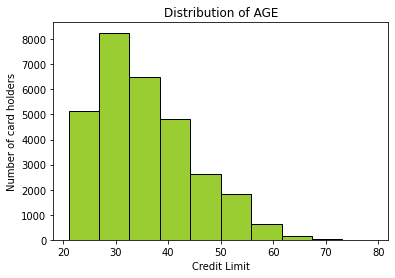

In [9]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist(default_df['AGE'], edgecolor='black', color='yellowgreen')
plt.title('Distribution of AGE')
plt.xlabel('Credit Limit')
plt.ylabel('Number of card holders')

Text(0, 0.5, 'Age')

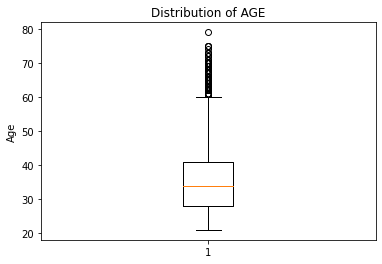

In [10]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.boxplot(default_df['AGE'])
plt.title('Distribution of AGE')
plt.ylabel('Age')

Text(0.5, 1.0, 'Distribution of SEX')

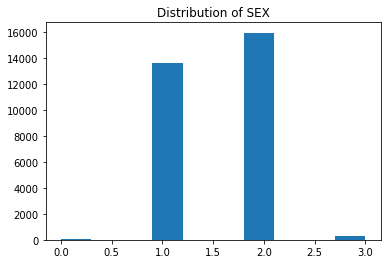

In [11]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist(default_df['MARRIAGE'])
plt.title('Distribution of SEX')

In [12]:
default_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
default_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Text(0, 0.5, 'Number of card holders')

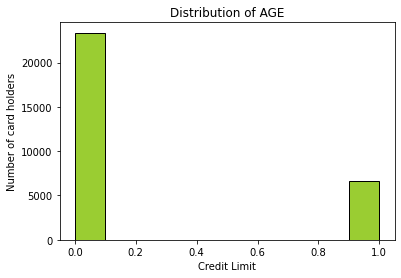

In [14]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist(default_df['default.payment.next.month'], edgecolor='black', color='yellowgreen')
plt.title('Distribution of AGE')
plt.xlabel('Credit Limit')
plt.ylabel('Number of card holders')

In [15]:
default_df.rename(columns={'default.payment.next.month':'DELIQUENT'}, inplace=True)
default_df['DELIQUENT'] = default_df['DELIQUENT'].map({1:'YES', 0:'NO'})


In [16]:
default_df['DELIQUENT']

0        YES
1        YES
2         NO
3         NO
4         NO
        ... 
29995     NO
29996     NO
29997    YES
29998    YES
29999    YES
Name: DELIQUENT, Length: 30000, dtype: object

In [17]:
default_df['GENDER'] = default_df['SEX'].map({1:'Male', 2:'Female'})

Text(0, 0.5, 'Number of card holders')

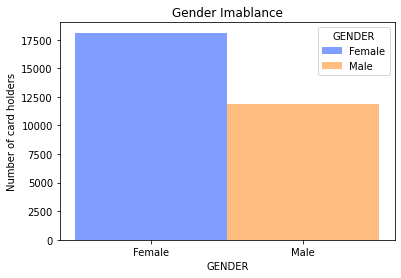

In [18]:
sns.histplot(data=default_df, x='GENDER', edgecolor='none', hue='GENDER', palette='bright')
plt.title('Gender Imablance')
plt.ylabel('Number of card holders')

Text(0, 0.5, 'Number of card holders')

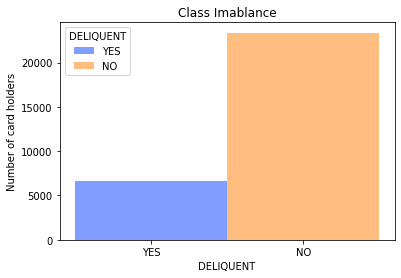

In [37]:
sns.histplot(data=default_df, x='DELIQUENT', edgecolor='none', hue='DELIQUENT', palette='bright')
plt.title('Class Imablance')
plt.ylabel('Number of card holders')

(array([2.0000e+00, 2.1885e+04, 6.0070e+03, 1.5340e+03, 3.9700e+02,
        1.4300e+02, 2.7000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-165580. ,  -52570.9,   60438.2,  173447.3,  286456.4,  399465.5,
         512474.6,  625483.7,  738492.8,  851501.9,  964511. ]),
 <a list of 10 Patch objects>)

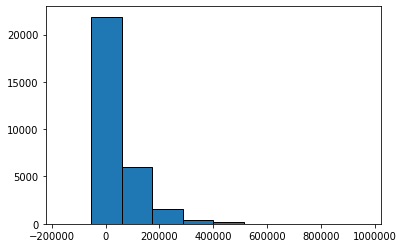

In [20]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.hist(x=default_df['BILL_AMT1'], edgecolor='black')

In [21]:
bill_amnt_df = default_df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bill_amnt_df

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0


In [22]:
payment_amnt_df = default_df[['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
payment_amnt_df

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...
29995,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


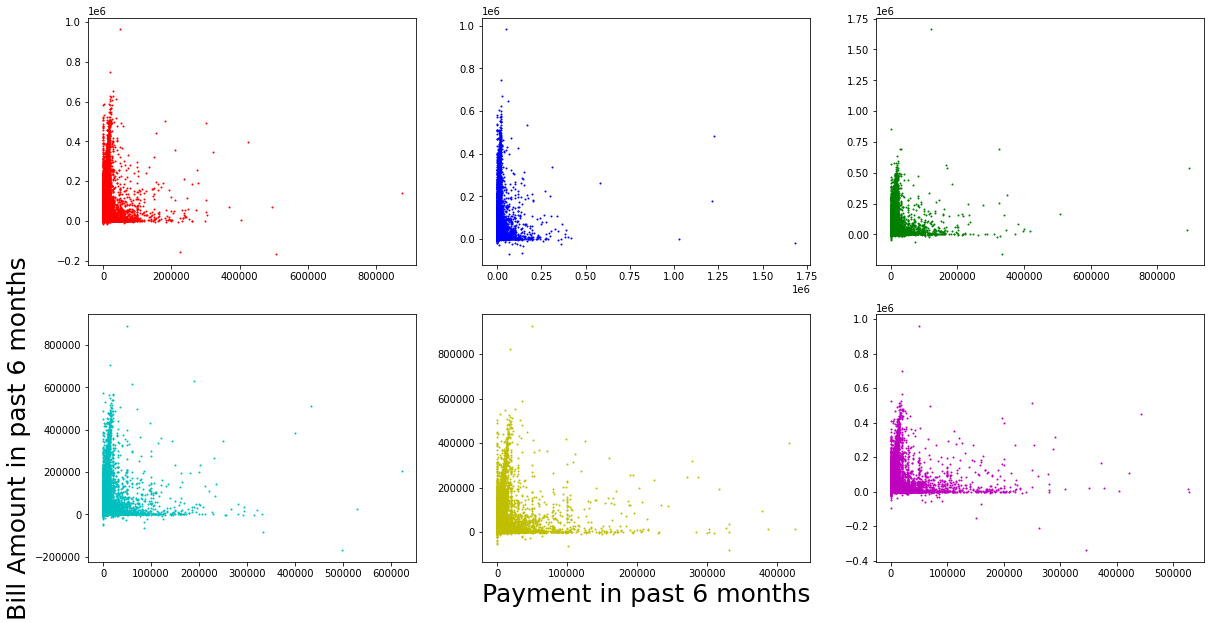

In [23]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=default_df.PAY_AMT1, y=default_df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=default_df.PAY_AMT2, y=default_df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=default_df.PAY_AMT3, y=default_df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=default_df.PAY_AMT4, y=default_df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=default_df.PAY_AMT5, y=default_df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=default_df.PAY_AMT6, y=default_df.BILL_AMT6, c='m', s=1)

plt.show()

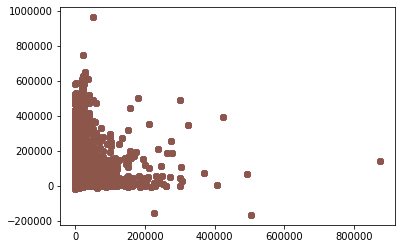

In [24]:
plt.ticklabel_format(useOffset=False, style='plain')
for pay_cols in payment_amnt_df.columns:
  plt.scatter(x=payment_amnt_df.PAY_AMT1, y=bill_amnt_df.BILL_AMT1)

In [25]:
default_df.drop(columns=['ID'], inplace=True)

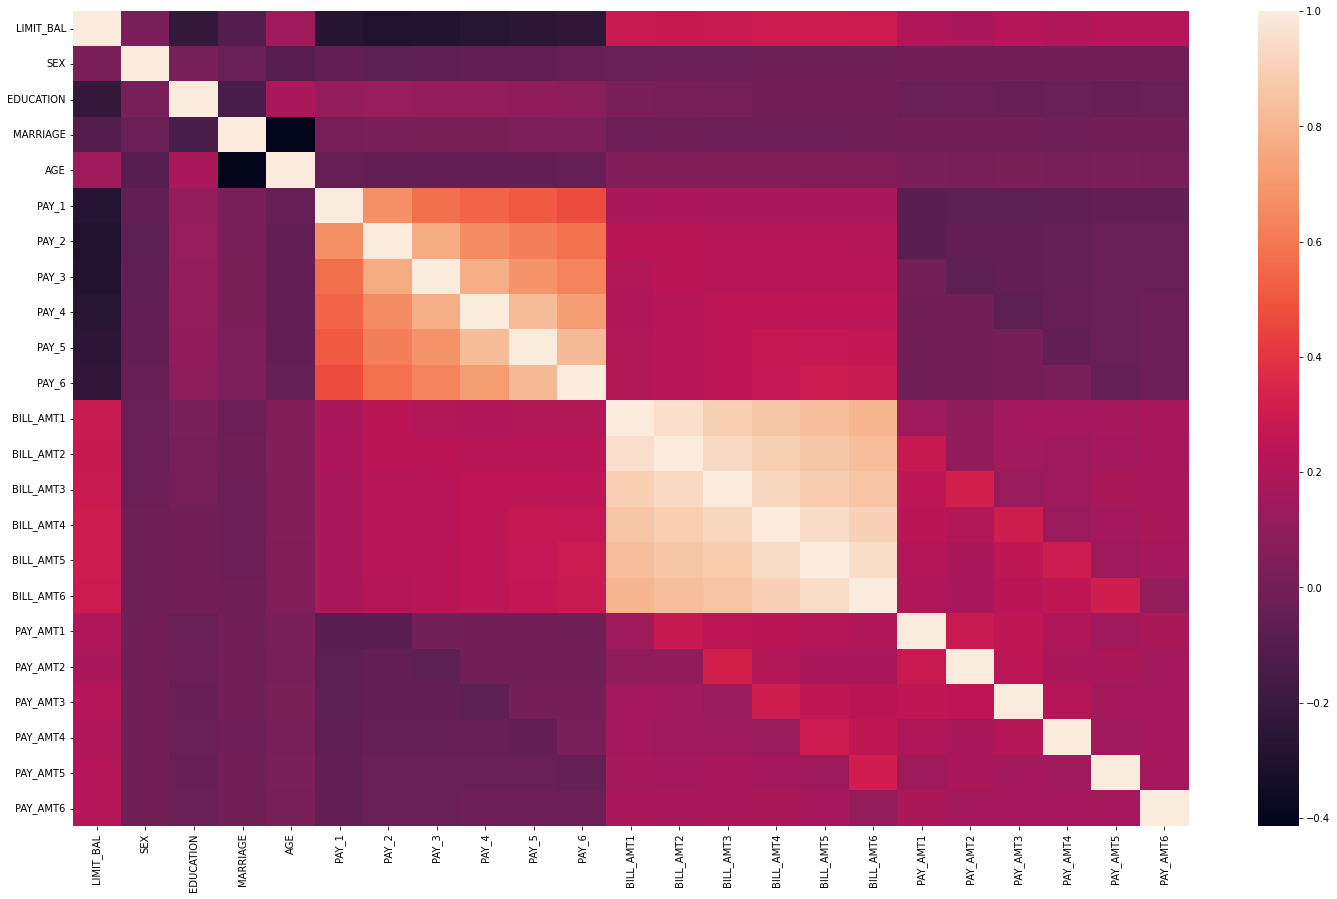

In [26]:
plt.figure(figsize = [25, 15], clear = True, facecolor = "white")

sns.heatmap(default_df.corr())

In [27]:
bill_amnt_df[bill_amnt_df<50000]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29995,NaN,NaN,NaN,NaN,31237.0,15980.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0
29998,-1645.0,NaN,NaN,NaN,11855.0,48944.0


Text(0.5, 0, 'Bill Amount')

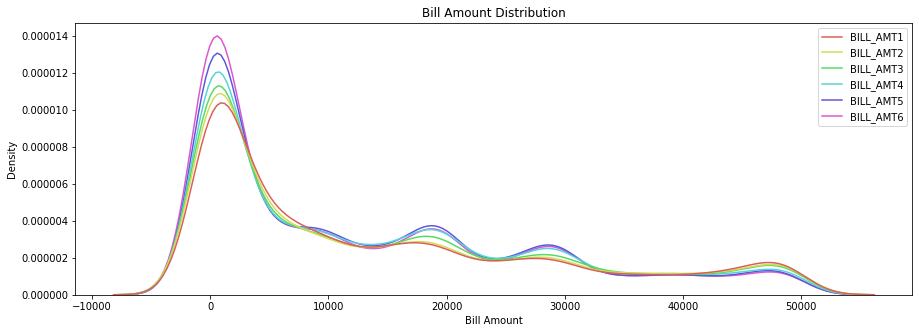

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Bill Amount Distribution')
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#sns.set_context("poster")
sns.kdeplot(data=bill_amnt_df[(bill_amnt_df<50000) & (bill_amnt_df>-2000)], palette='hls',ax=ax)
plt.xlabel('Bill Amount')